In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('data.csv')
real_distance = data.iloc[:, 1].values
measured_distance = data.iloc[:, 2].values
power = data.iloc[:, 3].values
delta= data.iloc[:, 4].values
data_X = np.vstack((measured_distance,delta)).T
data_y = delta
print(data_X.shape)

(1006, 2)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

In [4]:
batch_sizes=[4,8]
middle_layer_sizes=[x for x in range(4,20,4)]

In [8]:
print(X_test)
print(y_test)

[[1.0240e+01 2.9200e-01]
 [5.0420e+01 3.6800e-01]
 [5.5790e+01 3.8700e-01]
 [4.2300e+00 1.7600e-01]
 [3.0700e+00 7.9000e-02]
 [5.5780e+01 3.7700e-01]
 [5.5760e+01 3.5700e-01]
 [4.2000e+00 1.4600e-01]
 [1.5410e+01 2.7100e-01]
 [1.1104e+02 6.2500e-01]
 [9.0430e+01 5.7700e-01]
 [3.1700e+00 1.7900e-01]
 [7.6100e+00 2.3900e-01]
 [3.0990e+01 3.9200e-01]
 [1.4141e+02 6.8200e-01]
 [4.5900e+01 3.7200e-01]
 [6.0560e+01 4.3200e-01]
 [1.0036e+02 5.8300e-01]
 [1.5410e+01 2.7100e-01]
 [1.2047e+02 6.1800e-01]
 [9.5990e+01 5.3000e-01]
 [4.5900e+01 3.7200e-01]
 [1.3655e+02 6.0400e-01]
 [1.4138e+02 6.5200e-01]
 [4.0780e+01 3.9900e-01]
 [1.4417e+02 7.4500e-01]
 [3.1700e+00 1.7900e-01]
 [1.4412e+02 6.9500e-01]
 [2.1170e+01 4.5200e-01]
 [8.5480e+01 5.1500e-01]
 [6.5290e+01 4.6000e-01]
 [7.0860e+01 4.4300e-01]
 [1.2046e+02 6.0800e-01]
 [1.4139e+02 6.6200e-01]
 [7.6200e+00 2.4900e-01]
 [1.1103e+02 6.1500e-01]
 [9.0370e+01 5.1700e-01]
 [1.3660e+02 6.5400e-01]
 [1.4134e+02 6.1200e-01]
 [1.2576e+02 6.5600e-01]


In [6]:
prediction=0
parameters=[]
lowest_mse=1000000
best_parameters=None
for batch_size in batch_sizes:
    for size in middle_layer_sizes:
        model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='linear', input_shape=(2,)),
        tf.keras.layers.Dense(size, activation='linear'),
        tf.keras.layers.Dense(size, activation='linear'),
        tf.keras.layers.Dense(size, activation='linear'),
        tf.keras.layers.Dense(1)
        ])
        model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics='mse')
        model.fit(X_train, y_train, epochs=30, batch_size=batch_size,verbose=0)
        mse = model.evaluate(X_test, y_test, verbose=0)
        if mse[0] < lowest_mse:
            lowest_mse = mse[0]
            best_parameters = (batch_size,size,mse)
            best_model=model
        parameters.append((batch_size,size,mse))
        print(f"batch_size: {batch_size}, middle_layer_size: {size}, mse: {mse}")
        #lt.scatter(X_test, model.predict(X_test,verbose=0), label=f'{prediction}')
        prediction+=1
print(f"Best parameters are {best_parameters}")

batch_size: 4, middle_layer_size: 4, mse: [0.0023448464926332235, 0.0023448464926332235]
batch_size: 4, middle_layer_size: 8, mse: [0.002157265553250909, 0.002157265553250909]
batch_size: 4, middle_layer_size: 12, mse: [0.003959236666560173, 0.003959236666560173]
batch_size: 4, middle_layer_size: 16, mse: [0.0031395191326737404, 0.0031395191326737404]
batch_size: 8, middle_layer_size: 4, mse: [0.0006344850407913327, 0.0006344850407913327]
batch_size: 8, middle_layer_size: 8, mse: [0.0015531887765973806, 0.0015531887765973806]
batch_size: 8, middle_layer_size: 12, mse: [0.0038112555630505085, 0.0038112555630505085]
batch_size: 8, middle_layer_size: 16, mse: [0.0021519185975193977, 0.0021519185975193977]
Best parameters are (8, 4, [0.0006344850407913327, 0.0006344850407913327])


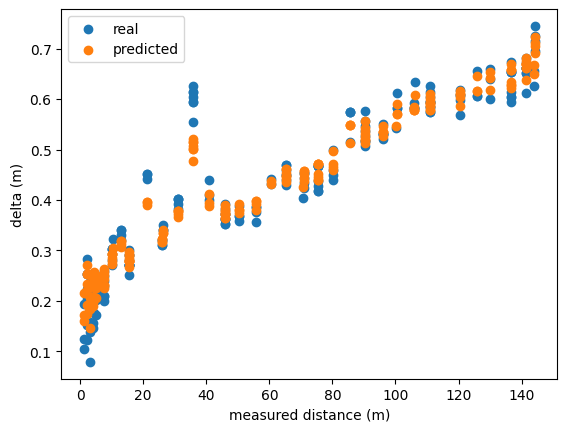

In [11]:
plt.scatter(X_test[:,1], y_test, label='real')
plt.scatter(X_test[:,1], best_model.predict(X_test,verbose=0), label='predicted')
plt.xlabel('measured distance (m)')
plt.ylabel('delta (m)')
plt.legend()
plt.show()

batch_size: 4, middle_layer_size: 4, mse: [0.00018120680761057884, 0.00018120680761057884]
batch_size: 4, middle_layer_size: 8, mse: [0.004071247298270464, 0.004071247298270464]
batch_size: 4, middle_layer_size: 12, mse: [0.001762536820024252, 0.001762536820024252]
batch_size: 4, middle_layer_size: 16, mse: [0.003987784497439861, 0.003987784497439861]
batch_size: 8, middle_layer_size: 4, mse: [0.012115116231143475, 0.012115116231143475]
batch_size: 8, middle_layer_size: 8, mse: [0.002108606044203043, 0.002108606044203043]
batch_size: 8, middle_layer_size: 12, mse: [0.006503236014395952, 0.006503236014395952]
batch_size: 8, middle_layer_size: 16, mse: [0.006772350519895554, 0.006772350519895554]
Best parameters are (4, 4, [0.00018120680761057884, 0.00018120680761057884])


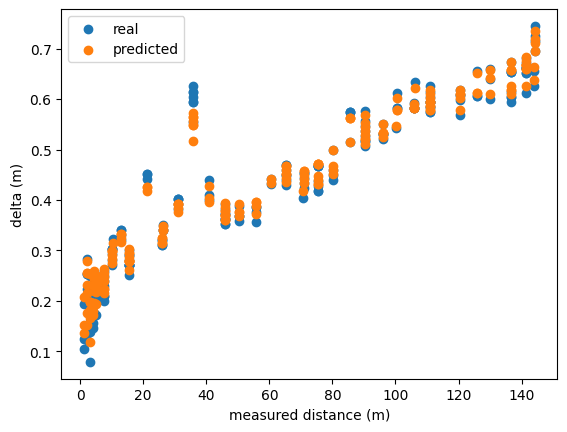

In [12]:
prediction=0
parameters=[]
lowest_mse=1000000
best_parameters=None
for batch_size in batch_sizes:
    for size in middle_layer_sizes:
        model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='linear', input_shape=(2,)),
        tf.keras.layers.Dense(size, activation='linear'),
        tf.keras.layers.Dense(size, activation='linear'),
        tf.keras.layers.Dense(1)
        ])
        model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics='mse')
        model.fit(X_train, y_train, epochs=30, batch_size=batch_size,verbose=0)
        mse = model.evaluate(X_test, y_test, verbose=0)
        if mse[0] < lowest_mse:
            lowest_mse = mse[0]
            best_parameters = (batch_size,size,mse)
            best_model=model
        parameters.append((batch_size,size,mse))
        print(f"batch_size: {batch_size}, middle_layer_size: {size}, mse: {mse}")
        #lt.scatter(X_test, model.predict(X_test,verbose=0), label=f'{prediction}')
        prediction+=1
print(f"Best parameters are {best_parameters}")
plt.scatter(X_test[:,0], y_test, label='real')
plt.scatter(X_test[:,0], best_model.predict(X_test,verbose=0), label='predicted')
plt.xlabel('measured distance (m)')
plt.ylabel('delta (m)')
plt.legend()
plt.show()

batch_size: 4, middle_layer_size: 4, mse: [0.025137312710285187, 0.025137312710285187]
batch_size: 4, middle_layer_size: 8, mse: [0.0016929866978898644, 0.0016929866978898644]
batch_size: 4, middle_layer_size: 12, mse: [0.00013712738291360438, 0.00013712738291360438]
batch_size: 4, middle_layer_size: 16, mse: [0.004071020055562258, 0.004071020055562258]
batch_size: 8, middle_layer_size: 4, mse: [0.0003552402777131647, 0.0003552402777131647]
batch_size: 8, middle_layer_size: 8, mse: [0.003758362727239728, 0.003758362727239728]
batch_size: 8, middle_layer_size: 12, mse: [0.004810149781405926, 0.004810149781405926]
batch_size: 8, middle_layer_size: 16, mse: [0.003977134823799133, 0.003977134823799133]
Best parameters are (4, 12, [0.00013712738291360438, 0.00013712738291360438])


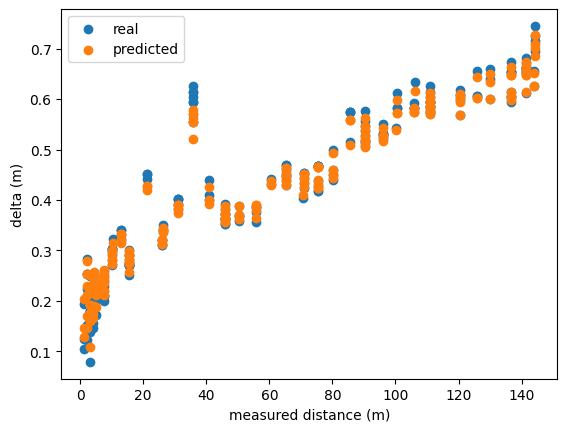

In [13]:
prediction=0
parameters=[]
lowest_mse=1000000
best_parameters=None
for batch_size in batch_sizes:
    for size in middle_layer_sizes:
        model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='linear', input_shape=(2,)),
        tf.keras.layers.Dense(size, activation='linear'),
        tf.keras.layers.Dense(1)
        ])
        model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics='mse')
        model.fit(X_train, y_train, epochs=30, batch_size=batch_size,verbose=0)
        mse = model.evaluate(X_test, y_test, verbose=0)
        if mse[0] < lowest_mse:
            lowest_mse = mse[0]
            best_parameters = (batch_size,size,mse)
            best_model=model
        parameters.append((batch_size,size,mse))
        print(f"batch_size: {batch_size}, middle_layer_size: {size}, mse: {mse}")
        #lt.scatter(X_test, model.predict(X_test,verbose=0), label=f'{prediction}')
        prediction+=1
print(f"Best parameters are {best_parameters}")
plt.scatter(X_test[:,0], y_test, label='real')
plt.scatter(X_test[:,0], best_model.predict(X_test,verbose=0), label='predicted')
plt.xlabel('measured distance (m)')
plt.ylabel('delta (m)')
plt.legend()
plt.show()